# INTRODUCTION

# BUSINESS uNDERSTANDING

# PROBLEM STATEMENT

# DATA uNDERSRTANDING
This dataset represents the median monthly home sales prices for 265 zip codes from April 1996 to April 2018 according to Zillow statistics.

A distinct zip code is represented by each row. Each record includes area details and monthly median sales prices for homes.

There are 14,723 rows and 272 variables:

* `RegionID`: Unique index, 58196 through 753844
* `RegionName`: Unique Zip Code, 1001 through 99901
* `City`: City in which the zip code is located
* `State`: State in which the zip code is located
* `Metro`: Metropolitan Area in which the zip code is located
* `CountyName`: County in which the zip code is located
* `SizeRank`: Numerical rank of size of zip code, ranked 1 through 14723
* `1996-04 through 2018-04`: refers to the median housing sales values for April 1996 through April 2018, that is 265 data points of monthly data for each zip code

# IMPORTING LIBRARIES

In [153]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import time
# from user_functions import *
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# READING THE DATASETS

In [154]:

pd.set_option("display.max_columns", None)

zillow_df = pd.read_csv('zillow_data.csv')
zillow_df.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,1996-11,1996-12,1997-01,1997-02,1997-03,1997-04,1997-05,1997-06,1997-07,1997-08,1997-09,1997-10,1997-11,1997-12,1998-01,1998-02,1998-03,1998-04,1998-05,1998-06,1998-07,1998-08,1998-09,1998-10,1998-11,1998-12,1999-01,1999-02,1999-03,1999-04,1999-05,1999-06,1999-07,1999-08,1999-09,1999-10,1999-11,1999-12,2000-01,2000-02,2000-03,2000-04,2000-05,2000-06,2000-07,2000-08,2000-09,2000-10,2000-11,2000-12,2001-01,2001-02,2001-03,2001-04,2001-05,2001-06,2001-07,2001-08,2001-09,2001-10,2001-11,2001-12,2002-01,2002-02,2002-03,2002-04,2002-05,2002-06,2002-07,2002-08,2002-09,2002-10,2002-11,2002-12,2003-01,2003-02,2003-03,2003-04,2003-05,2003-06,2003-07,2003-08,2003-09,2003-10,2003-11,2003-12,2004-01,2004-02,2004-03,2004-04,2004-05,2004-06,2004-07,2004-08,2004-09,2004-10,2004-11,2004-12,2005-01,2005-02,2005-03,2005-04,2005-05,2005-06,2005-07,2005-08,2005-09,2005-10,2005-11,2005-12,2006-01,2006-02,2006-03,2006-04,2006-05,2006-06,2006-07,2006-08,2006-09,2006-10,2006-11,2006-12,2007-01,2007-02,2007-03,2007-04,2007-05,2007-06,2007-07,2007-08,2007-09,2007-10,2007-11,2007-12,2008-01,2008-02,2008-03,2008-04,2008-05,2008-06,2008-07,2008-08,2008-09,2008-10,2008-11,2008-12,2009-01,2009-02,2009-03,2009-04,2009-05,2009-06,2009-07,2009-08,2009-09,2009-10,2009-11,2009-12,2010-01,2010-02,2010-03,2010-04,2010-05,2010-06,2010-07,2010-08,2010-09,2010-10,2010-11,2010-12,2011-01,2011-02,2011-03,2011-04,2011-05,2011-06,2011-07,2011-08,2011-09,2011-10,2011-11,2011-12,2012-01,2012-02,2012-03,2012-04,2012-05,2012-06,2012-07,2012-08,2012-09,2012-10,2012-11,2012-12,2013-01,2013-02,2013-03,2013-04,2013-05,2013-06,2013-07,2013-08,2013-09,2013-10,2013-11,2013-12,2014-01,2014-02,2014-03,2014-04,2014-05,2014-06,2014-07,2014-08,2014-09,2014-10,2014-11,2014-12,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,84654,60657,Chicago,IL,Chicago,Cook,1,334200.0,335400.0,336500.0,337600.0,338500.0,339500.0,340400.0,341300.0,342600.0,344400.0,345700.0,346700.0,347800.0,349000.0,350400.0,352000.0,353900.0,356200.0,358800.0,361800.0,365700.0,370200.0,374700.0,378900.0,383500.0,388300.0,393300.0,398500.0,403800.0,409100.0,414600.0,420100.0,426200.0,432600.0,438600.0,444200.0,450000.0,455900.0,462100.0,468500.0,475300.0,482500.0,490200.0,498200.0,507200.0,516800.0,526300.0,535300.0,544500.0,553500.0,562400.0,571200.0,579800.0,588100.0,596300.0,604200.0,612200.0,620200.0,627700.0,634500.0,641000.0,647000.0,652700.0,658100.0,663300.0,668400.0,673400.0,678300.0,683200.0,688300.0,693300.0,698000.0,702400.0,706400.0,710200.0,714000.0,717800.0,721700.0,725700.0,729900.0,733400.0,735600.0,737200.0,739000.0,740900.0,742700.0,744400.0,746000.0,747200.0,748000.0,749000.0,750200.0,752300.0,755300.0,759200.0,764000.0,769600.0,775600.0,781900.0,787900.0,793200.0,798200.0,803100.0,807900.0,812900.0,818100.0,823100.0,828300.0,834100.0,839800.0,845600.0,851800.0,858000.0,864400.0,870700.0,876200.0,880700.0,884400.0,887600.0,890500.0,893300.0,895500.0,897300.0,899000.0,900400.0,902000.0,904400.0,907100.0,909700.0,911900.0,913000.0,913000.0,912000.0,909300.0,905300.0,901400.0,897900.0,895400.0,893600.0,891100.0,887000.0,881700.0,875900.0,870300.0,865100.0,859000.0,851500.0,843800.0,836400.0,830700.0,827300.0,824800.0,821600.0,818300.0,814600.0,809800.0,803600.0,795500.0,786900.0,780700.0,776900.0,774700.0,774200.0,774400.0,774600.0,775600.0,777800.0,775200.0,767900.0,764700.0,766100.0,764100.0,759700.0,754900.0,746200.0,737300.0,730800.0,729300.0,730200.0,730700.0,730000.0,730100.0,730100.0,731200.0,733900.0,735500.0,735400.0,734400.0,737500.0,737700.0,733700.0,734000.0,740300.0,744600.0,750500.0,760400.0,771800.0,780600.0,

In [155]:
zillow_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14723 entries, 0 to 14722
Columns: 272 entries, RegionID to 2018-04
dtypes: float64(219), int64(49), object(4)
memory usage: 30.6+ MB


In [156]:
# Check for missing values
zillow_df.isna().sum()

RegionID         0
RegionName       0
City             0
State            0
Metro         1043
              ... 
2017-12          0
2018-01          0
2018-02          0
2018-03          0
2018-04          0
Length: 272, dtype: int64

We can see that the `Metro` column has many missing values. Further investigation may be necessary to learn to deal with this column.

# DATA CLEANING
The initial step is to investigate each column. 
1. Analyzing the `RegionID` column which is the unique indices.

In [157]:
print(f"Count of unique entries", zillow_df.RegionID.value_counts())
print(f"Number of Unique values", zillow_df.RegionID.nunique())

Count of unique entries 73724     1
70551     1
99221     1
76688     1
82829     1
         ..
71176     1
91654     1
65029     1
100380    1
98304     1
Name: RegionID, Length: 14723, dtype: int64
Number of Unique values 14723


We can see that each entry is unique values maybe describing the different zipcodes of the properties. It would thus be necessary to change this value to a string data type.

In [158]:
zillow_df.RegionID = zillow_df.RegionID.astype('string')

2. Analyzing `Region Name` column: 
Unique Zip Code, 1001 through 99901 it it would be best to cast to a string.

In [159]:
print(f"Count of unique entries", zillow_df.RegionName.value_counts())
print(f"Number of Unique values", zillow_df.RegionName.nunique())

Count of unique entries 55324    1
74561    1
73538    1
31546    1
82070    1
        ..
75182    1
55343    1
1450     1
73129    1
65536    1
Name: RegionName, Length: 14723, dtype: int64
Number of Unique values 14723


In [160]:
zillow_df.RegionName = zillow_df.RegionName.astype('string')

In [161]:
# change the region name to the appropriate zipcodes between 1001 to 99901
for i in range(len(zillow_df)):
    zillow_df.RegionName[i] = zillow_df.RegionName[i].rjust(5, '0')

zillow_df[['RegionName', 'State']].sort_values(by=['RegionName'])

# change back to integer asthis would be used to determine the zipcodes
zillow_df.RegionName = zillow_df.RegionName.astype('int')



We can see that the `RegionName` column has been change to the unique codes of the different regions/ ststes between 01001 to 99901. This would be necessary to know the area and more about the `Region Name` and match to the various regions.

3. Analyzing `City` column which refers the city in which the zip code is located. It may be useful in getting the zipcode region name.

In [162]:
# There are 7554 unique values.
zillow_df.City.nunique()

7554

4. Analyzing `State` column

In [163]:
print(f"Count of unique entries", zillow_df.State.value_counts())
print(" ")
print(f"Number of Unique values", zillow_df.State.nunique())

Count of unique entries CA    1224
NY    1015
TX     989
PA     831
FL     785
OH     588
IL     547
NJ     502
MI     499
IN     428
NC     428
MA     417
TN     404
VA     401
MN     375
GA     345
WA     341
WI     332
MO     319
MD     317
CO     249
KS     241
AZ     230
OR     224
OK     221
SC     206
NH     199
LA     193
AL     183
IA     158
MS     153
KY     139
CT     124
UT     121
ID     110
AR     105
NV     103
ME      86
NE      83
WV      72
MT      71
HI      62
NM      60
RI      59
DE      41
ND      31
WY      31
AK      28
SD      19
DC      18
VT      16
Name: State, dtype: int64
 
Number of Unique values 51


5. Analyzing the `Metro` column which is the Metropolitan Area in which the zip code is located. 
Initial data exploration showed the presence of 1043 NaN values. It msybe be best to deal with these. Most probable appraoch would be to fill these with None meaning that there is no Metropolitan Area in the given zipcode. Perharps the presence of a Metrpolitan Area has an infleunce on the value of the 

In [164]:
# Deal with missing values
zillow_df.Metro.fillna('None', inplace=True)

In [165]:
print(f"Count of unique entries", zillow_df.Metro.value_counts())

print(f"Number of Unique values", zillow_df.Metro.nunique())


Count of unique entries None                              1043
New York                           779
Los Angeles-Long Beach-Anaheim     347
Chicago                            325
Philadelphia                       281
                                  ... 
Del Rio                              1
North Platte                         1
Indianola                            1
Alice                                1
Grants                               1
Name: Metro, Length: 702, dtype: int64
Number of Unique values 702


5. Analyzing the sales columns in the columns `1996-04 through 2018-04`.  which refers to the median housing sales values for April 1996 through April 2018, that is 265 data points of monthly data for each zip code.
This column is important in choosing the ROI yield.

The presence of NaN values in some of columns can make the model assume that the there were no sales in the zipcodes at those period. Which can be an incorrect assumption.

The period from 1996-04 to 2018-04 is a 22 year period maybe selecting different periods i.e 4 year median sales value, average median sales, 1 year median sales values.

In [166]:
# Create a column calcualting the ROI for a 5 year period.

zillow_df['1_yr_ROI'] = (zillow_df['2018-04'] - zillow_df['2017-04'])/(zillow_df['2017-04'])
zillow_df

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,1996-11,1996-12,1997-01,1997-02,1997-03,1997-04,1997-05,1997-06,1997-07,1997-08,1997-09,1997-10,1997-11,1997-12,1998-01,1998-02,1998-03,1998-04,1998-05,1998-06,1998-07,1998-08,1998-09,1998-10,1998-11,1998-12,1999-01,1999-02,1999-03,1999-04,1999-05,1999-06,1999-07,1999-08,1999-09,1999-10,1999-11,1999-12,2000-01,2000-02,2000-03,2000-04,2000-05,2000-06,2000-07,2000-08,2000-09,2000-10,2000-11,2000-12,2001-01,2001-02,2001-03,2001-04,2001-05,2001-06,2001-07,2001-08,2001-09,2001-10,2001-11,2001-12,2002-01,2002-02,2002-03,2002-04,2002-05,2002-06,2002-07,2002-08,2002-09,2002-10,2002-11,2002-12,2003-01,2003-02,2003-03,2003-04,2003-05,2003-06,2003-07,2003-08,2003-09,2003-10,2003-11,2003-12,2004-01,2004-02,2004-03,2004-04,2004-05,2004-06,2004-07,2004-08,2004-09,2004-10,2004-11,2004-12,2005-01,2005-02,2005-03,2005-04,2005-05,2005-06,2005-07,2005-08,2005-09,2005-10,2005-11,2005-12,2006-01,2006-02,2006-03,2006-04,2006-05,2006-06,2006-07,2006-08,2006-09,2006-10,2006-11,2006-12,2007-01,2007-02,2007-03,2007-04,2007-05,2007-06,2007-07,2007-08,2007-09,2007-10,2007-11,2007-12,2008-01,2008-02,2008-03,2008-04,2008-05,2008-06,2008-07,2008-08,2008-09,2008-10,2008-11,2008-12,2009-01,2009-02,2009-03,2009-04,2009-05,2009-06,2009-07,2009-08,2009-09,2009-10,2009-11,2009-12,2010-01,2010-02,2010-03,2010-04,2010-05,2010-06,2010-07,2010-08,2010-09,2010-10,2010-11,2010-12,2011-01,2011-02,2011-03,2011-04,2011-05,2011-06,2011-07,2011-08,2011-09,2011-10,2011-11,2011-12,2012-01,2012-02,2012-03,2012-04,2012-05,2012-06,2012-07,2012-08,2012-09,2012-10,2012-11,2012-12,2013-01,2013-02,2013-03,2013-04,2013-05,2013-06,2013-07,2013-08,2013-09,2013-10,2013-11,2013-12,2014-01,2014-02,2014-03,2014-04,2014-05,2014-06,2014-07,2014-08,2014-09,2014-10,2014-11,2014-12,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,1_yr_ROI
0,84654,60657,Chicago,IL,Chicago,Cook,1,334200.0,335400.0,336500.0,337600.0,338500.0,339500.0,340400.0,341300.0,342600.0,344400.0,345700.0,346700.0,347800.0,349000.0,350400.0,352000.0,353900.0,356200.0,358800.0,361800.0,365700.0,370200.0,374700.0,378900.0,383500.0,388300.0,393300.0,398500.0,403800.0,409100.0,414600.0,420100.0,426200.0,432600.0,438600.0,444200.0,450000.0,455900.0,462100.0,468500.0,475300.0,482500.0,490200.0,498200.0,507200.0,516800.0,526300.0,535300.0,544500.0,553500.0,562400.0,571200.0,579800.0,588100.0,596300.0,604200.0,612200.0,620200.0,627700.0,634500.0,641000.0,647000.0,652700.0,658100.0,663300.0,668400.0,673400.0,678300.0,683200.0,688300.0,693300.0,698000.0,702400.0,706400.0,710200.0,714000.0,717800.0,721700.0,725700.0,729900.0,733400.0,735600.0,737200.0,739000.0,740900.0,742700.0,744400.0,746000.0,747200.0,748000.0,749000.0,750200.0,752300.0,755300.0,759200.0,764000.0,769600.0,775600.0,781900.0,787900.0,793200.0,798200.0,803100.0,807900.0,812900.0,818100.0,823100.0,828300.0,834100.0,839800.0,845600.0,851800.0,858000.0,864400.0,870700.0,876200.0,880700.0,884400.0,887600.0,890500.0,893300.0,895500.0,897300.0,899000.0,900400.0,902000.0,904400.0,907100.0,909700.0,911900.0,913000.0,913000.0,912000.0,909300.0,905300.0,901400.0,897900.0,895400.0,893600.0,891100.0,887000.0,881700.0,875900.0,870300.0,865100.0,859000.0,851500.0,843800.0,836400.0,830700.0,827300.0,824800.0,821600.0,818300.0,814600.0,809800.0,803600.0,795500.0,786900.0,780700.0,776900.0,774700.0,774200.0,774400.0,774600.0,775600.0,777800.0,775200.0,767900.0,764700.0,766100.0,764100.0,759700.0,754900.0,746200.0,737300.0,730800.0,729300.0,730200.0,730700.0,730000.0,730100.0,730100.0,731200.0,733900.0,735500.0,735400.0,734400.0,737500.0,737700.0,733700.0,734000.0,740300.0,744600.0,750500.0,760400.0,771800.0,

In [167]:
# Create a column calcualting the ROI for a 5 year period.

zillow_df['5_yr_ROI'] = (zillow_df['2018-04'] - zillow_df['2013-04'])/(zillow_df['2014-07'])


In [168]:
# Create a column calcualting the ROI for a 10 year period.

zillow_df['10_yr_ROI'] = (zillow_df['2018-04'] - zillow_df['2008-04'])/(zillow_df['2008-04'])
zillow_df

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,1996-11,1996-12,1997-01,1997-02,1997-03,1997-04,1997-05,1997-06,1997-07,1997-08,1997-09,1997-10,1997-11,1997-12,1998-01,1998-02,1998-03,1998-04,1998-05,1998-06,1998-07,1998-08,1998-09,1998-10,1998-11,1998-12,1999-01,1999-02,1999-03,1999-04,1999-05,1999-06,1999-07,1999-08,1999-09,1999-10,1999-11,1999-12,2000-01,2000-02,2000-03,2000-04,2000-05,2000-06,2000-07,2000-08,2000-09,2000-10,2000-11,2000-12,2001-01,2001-02,2001-03,2001-04,2001-05,2001-06,2001-07,2001-08,2001-09,2001-10,2001-11,2001-12,2002-01,2002-02,2002-03,2002-04,2002-05,2002-06,2002-07,2002-08,2002-09,2002-10,2002-11,2002-12,2003-01,2003-02,2003-03,2003-04,2003-05,2003-06,2003-07,2003-08,2003-09,2003-10,2003-11,2003-12,2004-01,2004-02,2004-03,2004-04,2004-05,2004-06,2004-07,2004-08,2004-09,2004-10,2004-11,2004-12,2005-01,2005-02,2005-03,2005-04,2005-05,2005-06,2005-07,2005-08,2005-09,2005-10,2005-11,2005-12,2006-01,2006-02,2006-03,2006-04,2006-05,2006-06,2006-07,2006-08,2006-09,2006-10,2006-11,2006-12,2007-01,2007-02,2007-03,2007-04,2007-05,2007-06,2007-07,2007-08,2007-09,2007-10,2007-11,2007-12,2008-01,2008-02,2008-03,2008-04,2008-05,2008-06,2008-07,2008-08,2008-09,2008-10,2008-11,2008-12,2009-01,2009-02,2009-03,2009-04,2009-05,2009-06,2009-07,2009-08,2009-09,2009-10,2009-11,2009-12,2010-01,2010-02,2010-03,2010-04,2010-05,2010-06,2010-07,2010-08,2010-09,2010-10,2010-11,2010-12,2011-01,2011-02,2011-03,2011-04,2011-05,2011-06,2011-07,2011-08,2011-09,2011-10,2011-11,2011-12,2012-01,2012-02,2012-03,2012-04,2012-05,2012-06,2012-07,2012-08,2012-09,2012-10,2012-11,2012-12,2013-01,2013-02,2013-03,2013-04,2013-05,2013-06,2013-07,2013-08,2013-09,2013-10,2013-11,2013-12,2014-01,2014-02,2014-03,2014-04,2014-05,2014-06,2014-07,2014-08,2014-09,2014-10,2014-11,2014-12,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,1_yr_ROI,5_yr_ROI,10_yr_ROI
0,84654,60657,Chicago,IL,Chicago,Cook,1,334200.0,335400.0,336500.0,337600.0,338500.0,339500.0,340400.0,341300.0,342600.0,344400.0,345700.0,346700.0,347800.0,349000.0,350400.0,352000.0,353900.0,356200.0,358800.0,361800.0,365700.0,370200.0,374700.0,378900.0,383500.0,388300.0,393300.0,398500.0,403800.0,409100.0,414600.0,420100.0,426200.0,432600.0,438600.0,444200.0,450000.0,455900.0,462100.0,468500.0,475300.0,482500.0,490200.0,498200.0,507200.0,516800.0,526300.0,535300.0,544500.0,553500.0,562400.0,571200.0,579800.0,588100.0,596300.0,604200.0,612200.0,620200.0,627700.0,634500.0,641000.0,647000.0,652700.0,658100.0,663300.0,668400.0,673400.0,678300.0,683200.0,688300.0,693300.0,698000.0,702400.0,706400.0,710200.0,714000.0,717800.0,721700.0,725700.0,729900.0,733400.0,735600.0,737200.0,739000.0,740900.0,742700.0,744400.0,746000.0,747200.0,748000.0,749000.0,750200.0,752300.0,755300.0,759200.0,764000.0,769600.0,775600.0,781900.0,787900.0,793200.0,798200.0,803100.0,807900.0,812900.0,818100.0,823100.0,828300.0,834100.0,839800.0,845600.0,851800.0,858000.0,864400.0,870700.0,876200.0,880700.0,884400.0,887600.0,890500.0,893300.0,895500.0,897300.0,899000.0,900400.0,902000.0,904400.0,907100.0,909700.0,911900.0,913000.0,913000.0,912000.0,909300.0,905300.0,901400.0,897900.0,895400.0,893600.0,891100.0,887000.0,881700.0,875900.0,870300.0,865100.0,859000.0,851500.0,843800.0,836400.0,830700.0,827300.0,824800.0,821600.0,818300.0,814600.0,809800.0,803600.0,795500.0,786900.0,780700.0,776900.0,774700.0,774200.0,774400.0,774600.0,775600.0,777800.0,775200.0,767900.0,764700.0,766100.0,764100.0,759700.0,754900.0,746200.0,737300.0,730800.0,729300.0,730200.0,730700.0,730000.0,730100.0,730100.0,731200.0,733900.0,735500.0,735400.0,734400.0,737500.0,737700.0,733700.0,734000.0,740300.0,744600.0,750500.0

VISUALIZING THE SPREAD OF THE ROI

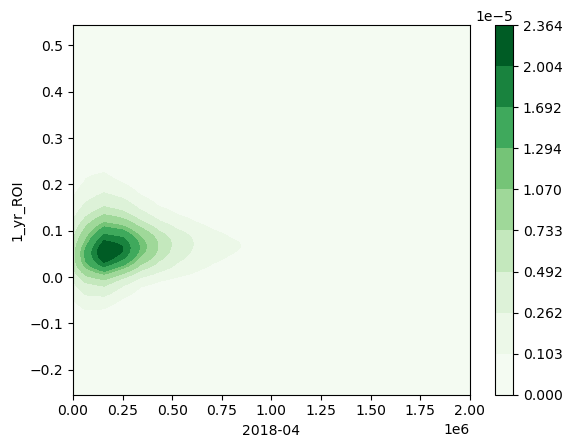

In [169]:
sns.kdeplot(data=zillow_df, x='2018-04', y='1_yr_ROI', legend = True, cmap="Greens", 
            shade=True, shade_lowest=True,cbar=True, color='b')
            
plt.xlim(0,2000000);

TIME SERIES DATA PREPROCESSING.
It is necessary to change the 


# EXPLORATORY DATA ANALYSIS

font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 22}

matplotlib.rc('font', **font)


RESHAPING TIME SERIES DATA
it would be necessary to chnge the dataframe from wide to long format

In [170]:
def melt_df(df):
    # Create a `Date` column to store data information
    melt = pd.melt(df, id_vars=[ 'RegionID','RegionName','City', 'State', 'Metro', 'CountyName', '1_yr_ROI', '5_yr_ROI', '10_yr_ROI'], var_name='Date', value_name='value')
    
    # 'Date' column is then converted to datetime format
    melt['Date'] = pd.to_datetime(melt['Date'], errors='coerce',format='%Y-%m' )  # Use 'coerce' to handle invalid dates
    
    # Drop rows with missing date 
    melt = melt.dropna(subset=['value'])  # Ensure 'Date' and 'value' columns are present
    return melt

zillow_melted_df = melt_df(zillow_df)
zillow_melted_df

,RegionID,RegionName,City,State,Metro,CountyName,1_yr_ROI,5_yr_ROI,10_yr_ROI,Date,value
0,84654,60657,Chicago,IL,Chicago,Cook,0.041852,0.238799,0.191307,NaT,1.0
1,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,0.057162,0.465696,0.523674,NaT,2.0
2,91982,77494,Katy,TX,Houston,Harris,0.030937,0.250430,0.322244,NaT,3.0
3,84616,60614,Chicago,IL,Chicago,Cook,0.019103,0.230110,0.142383,NaT,4.0
4,93144,79936,El Paso,TX,El Paso,El Paso,0.029661,0.070237,-0.053001,NaT,5.0
...,...,...,...,...,...,...,...,...,...,...,...
3916313,58333,1338,Ashfield,MA,Greenfield Town,Franklin,-0.010402,0.156118,0.058140,2018-04-01,209300.0
3916314,59107,3293,Woodstock,NH,Claremont,Grafton,0.162120,0.300768,-0.005724,2018-04-01,225800.0
3916315,75672,40404,Berea,KY,Richmond,Madison,0.104305,0.333013,0.292636,2018-04-01,133400.0
3916316,93733,81225,Mount Crested Butte,CO,None,Gunnison,0.121350,0.247446,0.040238,2018-04-01,664400.0


In [171]:
zillow_melted_df.describe()

,RegionName,1_yr_ROI,5_yr_ROI,10_yr_ROI,value
count,3.759427e+06,3.759427e+06,3.751508e+06,3.709818e+06,3.759427e+06
mean,4.800973e+04,7.119088e-02,3.084889e-01,1.462345e-01,2.068222e+05
std,2.959284e+04,5.754291e-02,1.977810e-01,2.150903e-01,2.398767e+05
min,1.001000e+03,-2.181352e-01,-3.064067e-01,-5.565217e-01,1.000000e+00
25%,2.163500e+04,3.628585e-02,1.663480e-01,6.027122e-03,9.730000e+04
50%,4.583000e+04,6.592040e-02,2.711023e-01,1.272523e-01,1.471000e+05
75%,7.547300e+04,9.965238e-02,4.176428e-01,2.540395e-01,2.366000e+05
max,9.990100e+04,5.080775e-01,1.347985e+00,1.664748e+00,1.931490e+07


# MODELING
We can first start to looking to the distribtuion of the ROI within the periods


Univariate analysis to see the distribution of house values

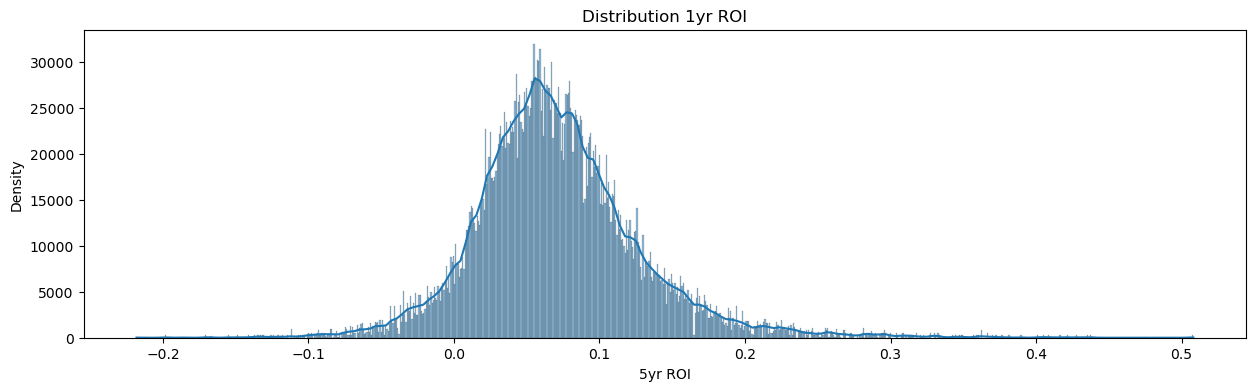

In [172]:
# distribtuion of 5 year ROI period
plt.figure(figsize=(15,4))
sns.histplot(zillow_melted_df['1_yr_ROI'],kde=True)
plt.title('Distribution 1yr ROI')
plt.ylabel('Density')
plt.xlabel('5yr ROI')
plt.show()

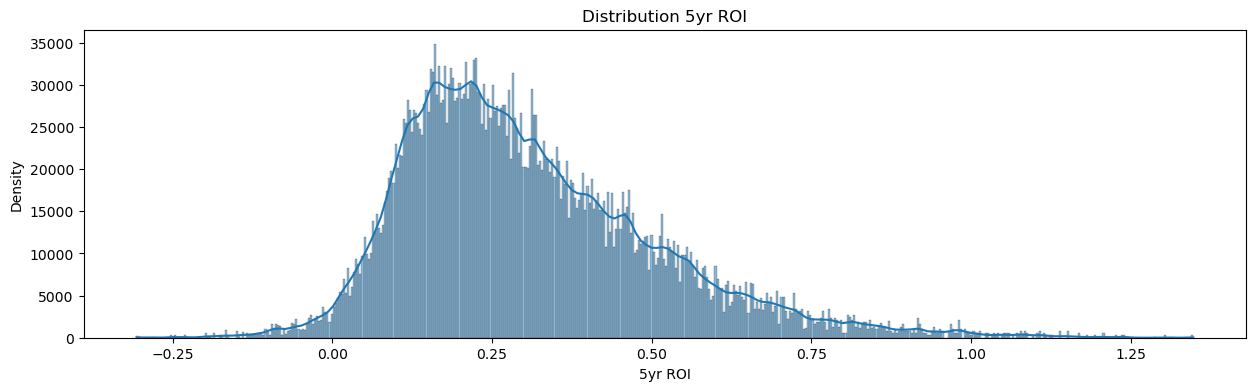

In [173]:
# distribtuion of 5 year ROI period
plt.figure(figsize=(15,4))
sns.histplot(zillow_melted_df['5_yr_ROI'],kde=True)
plt.title('Distribution 5yr ROI')
plt.ylabel('Density')
plt.xlabel('5yr ROI')
plt.show()

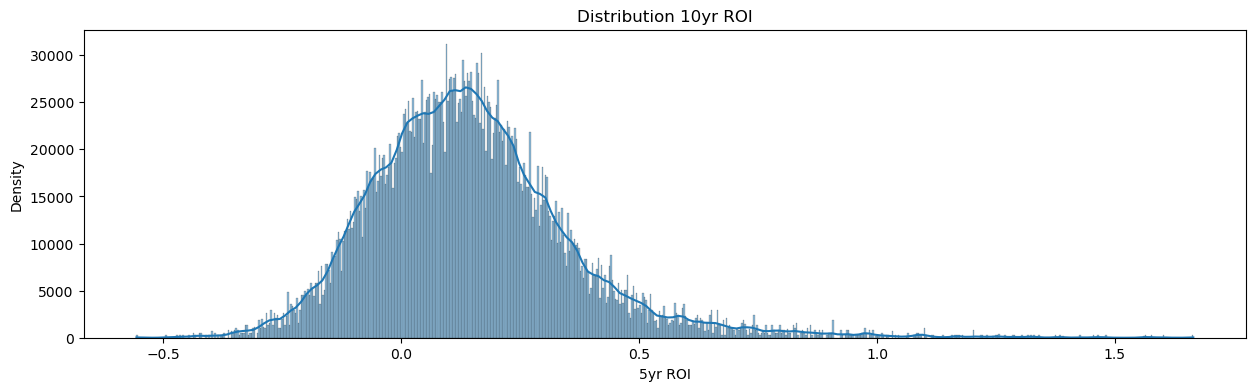

In [174]:
# distribtuion of 5 year ROI period
plt.figure(figsize=(15,4))
sns.histplot(zillow_melted_df['10_yr_ROI'],kde=True)
plt.title('Distribution 10yr ROI')
plt.ylabel('Density')
plt.xlabel('5yr ROI')
plt.show()

Multivariate analysis: looking for the relation between the Return On Investemetn among the different periods.

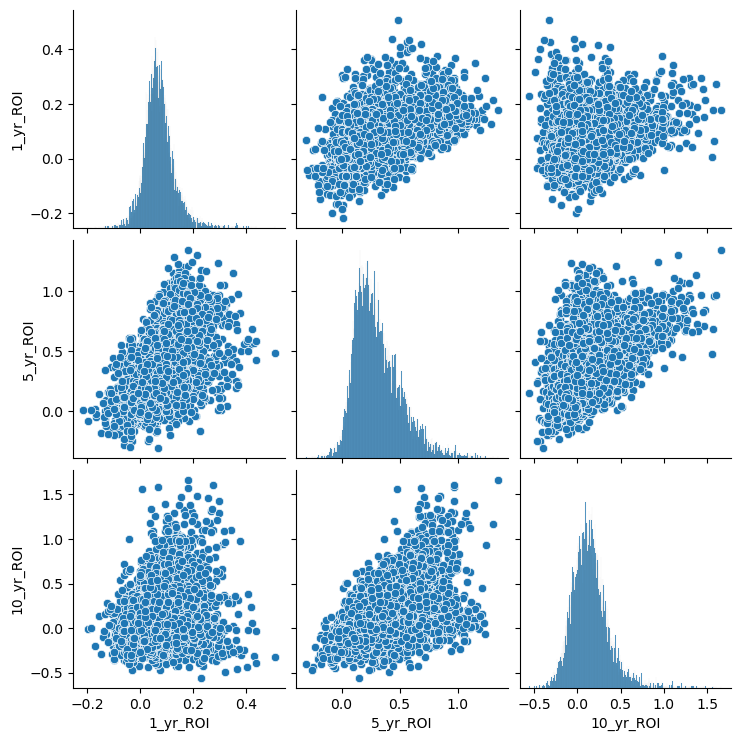

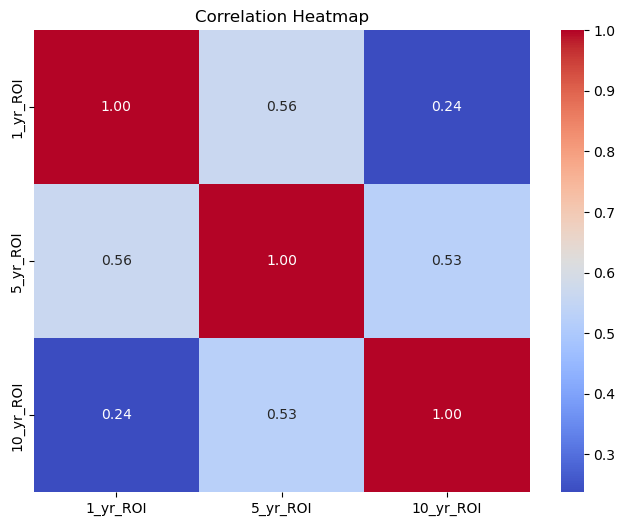

In [175]:
# Pairplot to visualize relationships
sns.pairplot(zillow_melted_df[['1_yr_ROI', '5_yr_ROI', '10_yr_ROI']])

# Heatmap to visualize the correlation between ROI in the different periods
correlation_matrix = zillow_melted_df[['1_yr_ROI', '5_yr_ROI', '10_yr_ROI']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

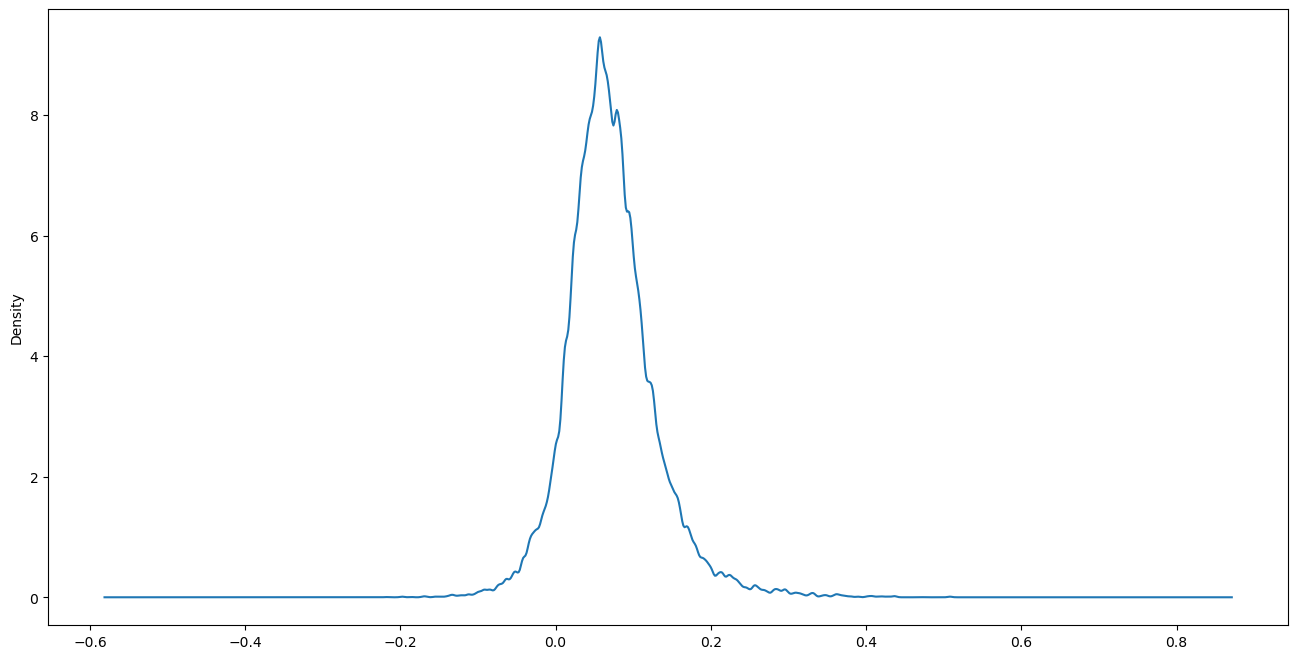

In [176]:
# plot a density plot for the zillow_melted_df
zillow_melted_df['1_yr_ROI'].plot(figsize = (16,8),kind='kde');

In [177]:
# plot a density plot for the zillow_melted_df
zillow_melted_df['5_yr_ROI'].plot(figsize = (16,8),kind='kde');

<Axes: ylabel='Density'>

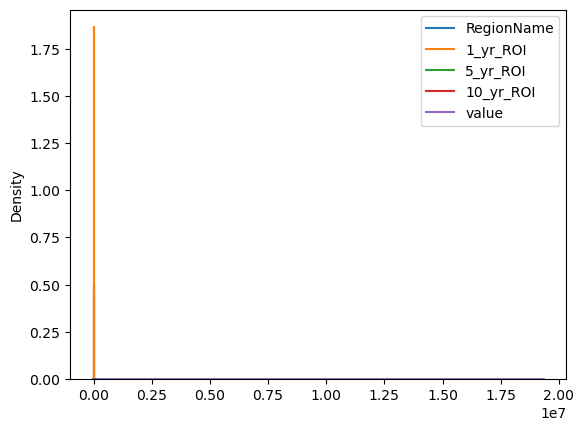

In [ ]:
sns.kdeplot(data=zillow_melted_df)

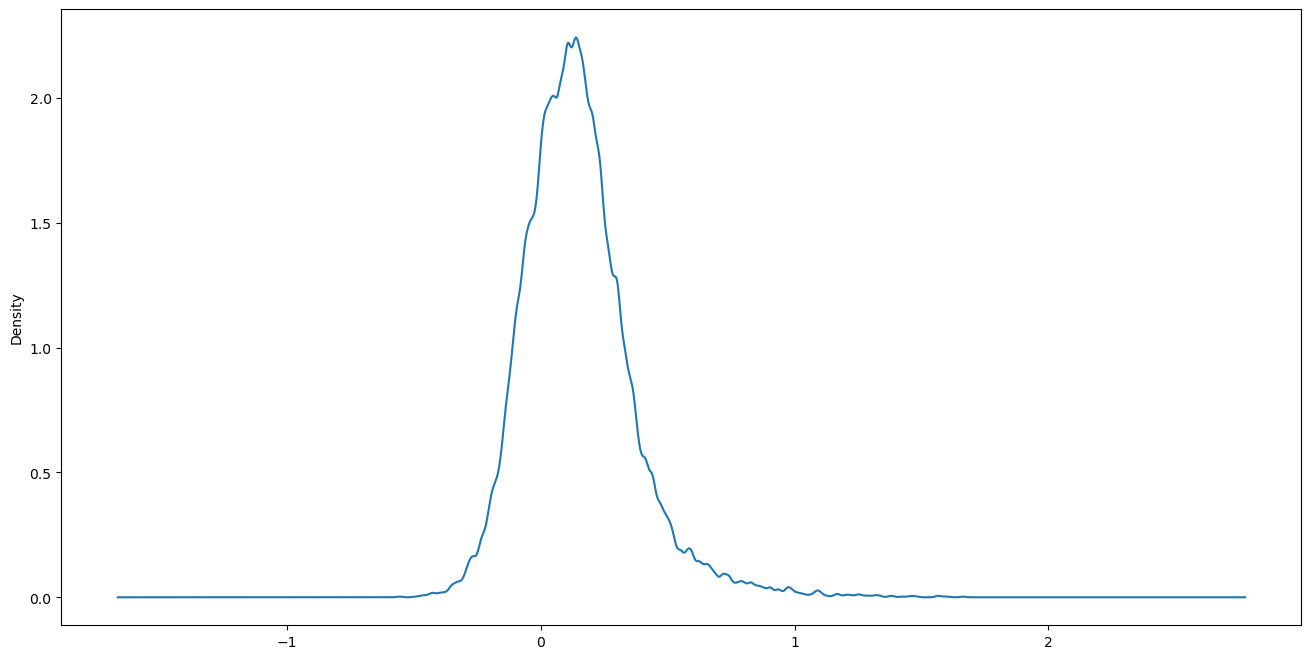

In [ ]:
# plot a density plot for the zillow_melted_df
zillow_melted_df['10_yr_ROI'].plot(figsize = (16,8),kind='kde');

# VISUALIZING TIME SERIES PLOTS ARIMA MODELING

In [152]:
# # create a dataframe for time series data
# zillow_melted_ts_df = zillow_melted_df[['Date', 'value', 'RegionName']]

# # drop column with null date values
# zillow_melted_ts = zillow_melted_ts_df.dropna(subset=['Date'], inplace=True)

# # set the `date` column as the index
# zillow_melted_ts = zillow_melted_ts_df.set_index('Date')

# sns.lineplot(data=zillow_melted_df, hue='RegionName', x='Date', y='value')
zillow_melted_pivotted = zillow_melted_df.pivot("Date", "RegioName","value" )
zillow_melted_pivotted.head()



KeyError: 'Date'

# check for stationarity in the data.



In [ ]:
# Create a function to check for the stationarity of a given time series using rolling stats and DF test
# Collect and package the code from previous labs
def stationarity_check(ts,w=8):
    """
    ts -> the time series dataframe
    w -> open ended window value to be defined as int
    """
    from statsmodels.tsa.stattools import adfuller
    
    rolling_mean = ts.rolling(window=w,center=False).mean()
    rolling_std = ts.rolling(window=w,center=False).std()
    
    ad_test = adfuller(ts)
    print('Dickey-Fuller P-value:',ad_test[1])
    
    fig = plt.figure(figsize=(10,6))
    plt.plot(ts)
    plt.plot(rolling_mean)
    plt.plot(rolling_std)

# INTERPRETING RESULTS

# CONCLUSION